<a href="https://colab.research.google.com/github/pallavi-sriv/final-project-io/blob/main/final_150epochs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
! pip install --upgrade --force-reinstall --no-deps kaggle

     |████████████████████████████████| 61kB 9.1MB/s 
  Created wheel for kaggle: filename=kaggle-1.5.12-cp37-none-any.whl size=73053 sha256=a45128305a701a13a32fbff22f8ac5796b3155479b71b94f6684e94d74c0d9d6
  Stored in directory: /root/.cache/pip/wheels/a1/6a/26/d30b7499ff85a4a4593377a87ecf55f7d08af42f0de9b60303
Successfully built kaggle
  Found existing installation: kaggle 1.5.10
    Uninstalling kaggle-1.5.10:
      Successfully uninstalled kaggle-1.5.10


In [2]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"pallavis301","key":"328d8c90dfdcc6517a29c85b49fb5805"}'}

In [3]:
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/

In [4]:
 ! chmod 600 ~/.kaggle/kaggle.json

In [5]:
! kaggle datasets download -d ravishranjan/flower-dataset

100% 714M/714M [00:05<00:00, 121MB/s]
100% 714M/714M [00:05<00:00, 125MB/s]


In [6]:
! unzip flower-dataset.zip -d dataset

Streaming output truncated to the last 5000 lines.
  inflating: dataset/flowers/flowers/train/38/image_05827.jpg  
  inflating: dataset/flowers/flowers/train/38/image_05828.jpg  
  inflating: dataset/flowers/flowers/train/38/image_05831.jpg  
  inflating: dataset/flowers/flowers/train/38/image_05832.jpg  
  inflating: dataset/flowers/flowers/train/38/image_05834.jpg  
  inflating: dataset/flowers/flowers/train/38/image_05835.jpg  
  inflating: dataset/flowers/flowers/train/38/image_05836.jpg  
  inflating: dataset/flowers/flowers/train/38/image_05837.jpg  
  inflating: dataset/flowers/flowers/train/38/image_05838.jpg  
  inflating: dataset/flowers/flowers/train/38/image_05839.jpg  
  inflating: dataset/flowers/flowers/train/38/image_05840.jpg  
  inflating: dataset/flowers/flowers/train/38/image_05841.jpg  
  inflating: dataset/flowers/flowers/train/38/image_05842.jpg  
  inflating: dataset/flowers/flowers/train/38/image_05843.jpg  
  inflating: dataset/flowers/flowers/train/38/image_0

In [7]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import os 
import pandas as pd

In [8]:
training_path = "/content/dataset/flowers/flowers/train_actual"
test_path = "/content/dataset/flowers/flowers/test_actual"

In [9]:
class_names = ['cyclamen flower','nasturtium flower','butterfly pea','canna flower','lily','bergamot flower','pink quill','foxglove','bougainvilla','rose mallow','abuliton mallow','ruellia','bromelia']

In [10]:
dataGen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale = 1./255,
    rotation_range=5,
    horizontal_flip=True,
    vertical_flip=True)

train_dataset_aug = dataGen.flow_from_directory(
    training_path,
    target_size = (224,224),
    batch_size = 32,
    shuffle=True,
    seed = 865)

test_dataset_aug = dataGen.flow_from_directory(
    test_path,
    target_size = (224,224),
    batch_size = 32,
    shuffle=True,
    seed = 865)

Found 999 images belonging to 13 classes.
Found 124 images belonging to 13 classes.


In [11]:
pretrained_model = tf.keras.applications.ResNet152(
    include_top=False,
    weights="imagenet",
    input_shape=(224,224,3),
)

234700800/234698864 [==============================] - 2s 0us/step


In [12]:
pretrained_model.trainable = False

In [13]:
model = tf.keras.models.Sequential()

In [14]:
model.add(pretrained_model)

In [15]:
model.add(tf.keras.layers.GlobalAveragePooling2D())

In [16]:
model.add(tf.keras.layers.Dense(1024, activation='relu'))
model.add(tf.keras.layers.Dense(512, activation='relu'))
model.add(tf.keras.layers.Dense(13, activation='softmax'))

In [17]:
model.compile(optimizer = 'adam',
                loss='categorical_crossentropy',metrics = ['accuracy'])

In [18]:
history = model.fit(train_dataset_aug, validation_data=test_dataset_aug, epochs = 150)

Epoch 1/150
32/32 [==============================] - 60s 670ms/step - loss: 2.7959 - accuracy: 0.1321 - val_loss: 2.4625 - val_accuracy: 0.1935
Epoch 2/150
32/32 [==============================] - 18s 566ms/step - loss: 2.4361 - accuracy: 0.2208 - val_loss: 2.4601 - val_accuracy: 0.2339
Epoch 3/150
32/32 [==============================] - 18s 562ms/step - loss: 2.3699 - accuracy: 0.2528 - val_loss: 2.4486 - val_accuracy: 0.2419
Epoch 4/150
32/32 [==============================] - 18s 572ms/step - loss: 2.3044 - accuracy: 0.2762 - val_loss: 2.3694 - val_accuracy: 0.2419
Epoch 5/150
32/32 [==============================] - 18s 561ms/step - loss: 2.2168 - accuracy: 0.2811 - val_loss: 2.3904 - val_accuracy: 0.2258
Epoch 6/150
32/32 [==============================] - 18s 568ms/step - loss: 2.2511 - accuracy: 0.2795 - val_loss: 2.3117 - val_accuracy: 0.2500
Epoch 7/150
32/32 [==============================] - 18s 564ms/step - loss: 2.2536 - accuracy: 0.2775 - val_loss: 2.3652 - val_accuracy:

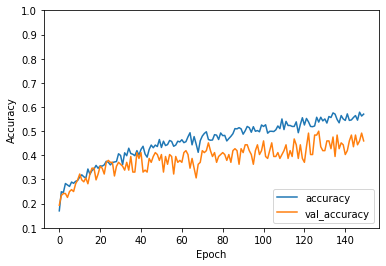

In [31]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.1, 1])
plt.legend(loc='lower right')

In [32]:
import cv2
img=cv2.imread('/content/dataset/flowers/flowers/test_actual/')

In [33]:
img= np.random.randint(0,10,(224,224,3))
img.shape

(224, 224, 3)

In [34]:
img=np.expand_dims(img,axis=0)
img.shape

(1, 224, 224, 3)

In [35]:
model.predict(img)

array([[7.1139720e-19, 1.2142484e-09, 1.3814037e-13, 1.4214214e-12,
        1.7826337e-20, 2.3067786e-18, 2.3301895e-01, 4.3058931e-06,
        2.5744512e-08, 4.9831069e-20, 7.6697522e-01, 3.0271762e-14,
        1.5657859e-06]], dtype=float32)